# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

### Define latent distribution of the model

In [1]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader 
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.VAEmodel import VAE
from jointvae.training_l import Trainer
from torch import optim
from viz.visualize_l import Visualizer
import matplotlib.pyplot as plt
import numpy as np



valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

# Latent distribution will be joint distribution of 10 gaussian normal distributions  7-14
# and one 10 dimensional Gumbel Softmax distribution
n_cont = 64
disc = [10]
n_disc = len(disc)
latent_spec = {'cont': n_cont,
               'disc': disc}

device = torch.device('cuda')
#model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
print(model)


lr=5e-4
# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=1.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0


lambda_d = 2
lambda_od = 10*lambda_d
lambda_dis = 30*lambda_d 
path="ReportFig/DIP-VAE/cont_{}/gamma_ {}lambda{}".format(n_cont,gamma,lambda_d)
# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
viz = Visualizer(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=64, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=64, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=74, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv

### Build a model

### Train the model

from jointvae.training import Trainer


trainer._train_epoch(train_loader,valid_loader)

In [2]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo
###1e-5 6859 1e-4 6727 5e-4 6722 try tanh/L1 loss/beta--->DIP
import time

start = time.time()
trainer.train(train_loader,valid_loader, epochs=100, save_training_gif=('./training.gif', viz))
end = time.time()
print(end - start)
torch.save(model.state_dict(), 'modelDIP_params.pkl')
torch.save(model, './modelDIP')
##15.078 - 0.0147  17.209 - 0.0168 error tanh 
##LR 1e-3 0.019-0.023 worse should pick 5e-4
##PLOT THE CURVE!!!!!
#16-2033.294813156128 32-2846.2241864204407 64-2800

0/54000	Loss: 351.613
3200/54000	Loss: 255.092
6400/54000	Loss: 189.954
9600/54000	Loss: 185.958
12800/54000	Loss: 183.841
16000/54000	Loss: 181.576
19200/54000	Loss: 178.721
22400/54000	Loss: 176.272
25600/54000	Loss: 173.687
28800/54000	Loss: 171.487
32000/54000	Loss: 169.999
35200/54000	Loss: 168.685
38400/54000	Loss: 167.060
41600/54000	Loss: 166.777
44800/54000	Loss: 165.599
48000/54000	Loss: 165.258
51200/54000	Loss: 164.416
Valid Loss: 163.684, Recon Error: 0.038
163.6842878625748
Epoch: 1 Average loss: 178.49 Valid loss: 163.6842878625748	Recon Error:0.038
0/54000	Loss: 162.097
3200/54000	Loss: 163.037
6400/54000	Loss: 162.203
9600/54000	Loss: 161.468
12800/54000	Loss: 159.833
16000/54000	Loss: 159.503
19200/54000	Loss: 158.545
22400/54000	Loss: 158.081
25600/54000	Loss: 157.836
28800/54000	Loss: 157.933
32000/54000	Loss: 157.039
35200/54000	Loss: 156.445
38400/54000	Loss: 157.340
41600/54000	Loss: 156.443
44800/54000	Loss: 155.884
48000/54000	Loss: 155.375
51200/54000	Loss: 15

25600/54000	Loss: 143.944
28800/54000	Loss: 143.867
32000/54000	Loss: 143.972
35200/54000	Loss: 144.146
38400/54000	Loss: 143.588
41600/54000	Loss: 143.829
44800/54000	Loss: 143.788
48000/54000	Loss: 143.945
51200/54000	Loss: 143.941
Valid Loss: 144.018, Recon Error: 0.016
144.01819919018035
Epoch: 15 Average loss: 144.01 Valid loss: 144.01819919018035	Recon Error:0.016
0/54000	Loss: 147.674
3200/54000	Loss: 143.399
6400/54000	Loss: 143.651
9600/54000	Loss: 143.716
12800/54000	Loss: 143.913
16000/54000	Loss: 144.074
19200/54000	Loss: 143.997
22400/54000	Loss: 143.986
25600/54000	Loss: 143.426
28800/54000	Loss: 143.654
32000/54000	Loss: 143.833
35200/54000	Loss: 143.846
38400/54000	Loss: 143.594
41600/54000	Loss: 143.060
44800/54000	Loss: 143.074
48000/54000	Loss: 143.565
51200/54000	Loss: 143.435
Valid Loss: 143.878, Recon Error: 0.019
143.87846585537525
Epoch: 16 Average loss: 143.69 Valid loss: 143.87846585537525	Recon Error:0.019
0/54000	Loss: 143.670
3200/54000	Loss: 143.350
6400/5

48000/54000	Loss: 140.105
51200/54000	Loss: 140.166
Valid Loss: 140.423, Recon Error: 0.016
140.42291292231133
Epoch: 29 Average loss: 140.06 Valid loss: 140.42291292231133	Recon Error:0.016
0/54000	Loss: 137.649
3200/54000	Loss: 139.248
6400/54000	Loss: 139.518
9600/54000	Loss: 139.733
12800/54000	Loss: 139.598
16000/54000	Loss: 139.452
19200/54000	Loss: 139.500
22400/54000	Loss: 139.982
25600/54000	Loss: 139.648
28800/54000	Loss: 139.697
32000/54000	Loss: 139.901
35200/54000	Loss: 140.088
38400/54000	Loss: 139.307
41600/54000	Loss: 140.071
44800/54000	Loss: 139.606
48000/54000	Loss: 139.272
51200/54000	Loss: 139.143
Valid Loss: 139.991, Recon Error: 0.017
139.99093400671126
Epoch: 30 Average loss: 139.65 Valid loss: 139.99093400671126	Recon Error:0.017
0/54000	Loss: 137.267
3200/54000	Loss: 139.423
6400/54000	Loss: 139.800
9600/54000	Loss: 139.720
12800/54000	Loss: 139.708
16000/54000	Loss: 140.093
19200/54000	Loss: 139.523
22400/54000	Loss: 140.007
25600/54000	Loss: 139.469
28800/54

0/54000	Loss: 135.928
3200/54000	Loss: 137.979
6400/54000	Loss: 137.905
9600/54000	Loss: 138.403
12800/54000	Loss: 138.259
16000/54000	Loss: 137.867
19200/54000	Loss: 138.129
22400/54000	Loss: 138.031
25600/54000	Loss: 138.021
28800/54000	Loss: 138.510
32000/54000	Loss: 138.018
35200/54000	Loss: 137.307
38400/54000	Loss: 137.482
41600/54000	Loss: 137.757
44800/54000	Loss: 137.549
48000/54000	Loss: 137.631
51200/54000	Loss: 137.780
Valid Loss: 138.831, Recon Error: 0.018
138.831313762259
Epoch: 44 Average loss: 137.94 Valid loss: 138.831313762259	Recon Error:0.018
0/54000	Loss: 139.791
3200/54000	Loss: 138.158
6400/54000	Loss: 137.717
9600/54000	Loss: 137.901
12800/54000	Loss: 138.027
16000/54000	Loss: 138.095
19200/54000	Loss: 137.370
22400/54000	Loss: 138.052
25600/54000	Loss: 137.469
28800/54000	Loss: 137.561
32000/54000	Loss: 137.639
35200/54000	Loss: 137.403
38400/54000	Loss: 137.872
41600/54000	Loss: 137.861
44800/54000	Loss: 137.557
48000/54000	Loss: 138.224
51200/54000	Loss: 137

22400/54000	Loss: 136.735
25600/54000	Loss: 136.786
28800/54000	Loss: 136.336
32000/54000	Loss: 136.854
35200/54000	Loss: 136.872
38400/54000	Loss: 136.334
41600/54000	Loss: 136.818
44800/54000	Loss: 136.821
48000/54000	Loss: 136.573
51200/54000	Loss: 136.899
Valid Loss: 136.900, Recon Error: 0.017
136.89990559030088
Epoch: 58 Average loss: 136.66 Valid loss: 136.89990559030088	Recon Error:0.017
0/54000	Loss: 138.525
3200/54000	Loss: 136.852
6400/54000	Loss: 136.306
9600/54000	Loss: 135.930
12800/54000	Loss: 136.448
16000/54000	Loss: 136.409
19200/54000	Loss: 136.703
22400/54000	Loss: 136.501
25600/54000	Loss: 136.600
28800/54000	Loss: 136.830
32000/54000	Loss: 136.406
35200/54000	Loss: 136.369
38400/54000	Loss: 136.416
41600/54000	Loss: 136.739
44800/54000	Loss: 136.493
48000/54000	Loss: 136.311
51200/54000	Loss: 136.076
Valid Loss: 136.938, Recon Error: 0.014
136.9379157208382
Epoch: 59 Average loss: 136.50 Valid loss: 136.9379157208382	Recon Error:0.014
0/54000	Loss: 138.181
3200/54

44800/54000	Loss: 135.564
48000/54000	Loss: 135.641
51200/54000	Loss: 135.674
Valid Loss: 135.908, Recon Error: 0.019
135.9083560375457
Epoch: 72 Average loss: 135.56 Valid loss: 135.9083560375457	Recon Error:0.019
0/54000	Loss: 134.920
3200/54000	Loss: 135.490
6400/54000	Loss: 134.619
9600/54000	Loss: 134.965
12800/54000	Loss: 135.450
16000/54000	Loss: 135.136
19200/54000	Loss: 135.478
22400/54000	Loss: 135.613
25600/54000	Loss: 135.435
28800/54000	Loss: 135.673
32000/54000	Loss: 135.077
35200/54000	Loss: 135.407
38400/54000	Loss: 135.190
41600/54000	Loss: 135.529
44800/54000	Loss: 135.290
48000/54000	Loss: 135.507
51200/54000	Loss: 136.075
Valid Loss: 135.918, Recon Error: 0.015
135.91790544225813
Epoch: 73 Average loss: 135.42 Valid loss: 135.91790544225813	Recon Error:0.015
0/54000	Loss: 136.278
3200/54000	Loss: 135.285
6400/54000	Loss: 135.082
9600/54000	Loss: 135.100
12800/54000	Loss: 135.076
16000/54000	Loss: 135.314
19200/54000	Loss: 134.585
22400/54000	Loss: 135.456
25600/5400

0/54000	Loss: 131.187
3200/54000	Loss: 134.709
6400/54000	Loss: 134.527
9600/54000	Loss: 134.543
12800/54000	Loss: 134.361
16000/54000	Loss: 134.526
19200/54000	Loss: 134.603
22400/54000	Loss: 134.872
25600/54000	Loss: 133.836
28800/54000	Loss: 134.673
32000/54000	Loss: 134.485
35200/54000	Loss: 134.817
38400/54000	Loss: 134.787
41600/54000	Loss: 134.490
44800/54000	Loss: 134.341
48000/54000	Loss: 134.700
51200/54000	Loss: 134.458
Valid Loss: 135.349, Recon Error: 0.019
135.34900389326378
Epoch: 87 Average loss: 134.59 Valid loss: 135.34900389326378	Recon Error:0.019
0/54000	Loss: 133.675
3200/54000	Loss: 134.339
6400/54000	Loss: 134.068
9600/54000	Loss: 134.056
12800/54000	Loss: 134.685
16000/54000	Loss: 135.271
19200/54000	Loss: 134.290
22400/54000	Loss: 134.483
25600/54000	Loss: 135.182
28800/54000	Loss: 134.315
32000/54000	Loss: 134.602
35200/54000	Loss: 134.648
38400/54000	Loss: 134.175
41600/54000	Loss: 134.459
44800/54000	Loss: 134.248
48000/54000	Loss: 134.437
51200/54000	Loss:

In [3]:
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
model.load_state_dict(torch.load('modelDIP_params.pkl'))
#path="figures/face/cont_{}/pruned_Beta_ {}lamba{}_ONLYPAIR".format(n_cont,gamma,0.1)
loss = trainer.get_losses()
print(len(loss["DIP_loss"]))
print(lr)

18760
0.0005


# torch.cuda.is_available()
# device = torch.device('cuda')
# print(device)
torch.cuda.current_device()
torch.cuda.get_device_name(device)

###Chi-square test
import torch
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
tensor_two = torch.tensor([[6,8,9],[10,11,12]])
tensor_list = [tensor_one, tensor_two]
tens_list = []
for tensor in tensor_list:
    
    print(tensor)
    length = tensor.shape[1]
    tens_list.append(torch.mean(tensor.float(),dim=0))
    
tens_list = torch.stack(tens_list).reshape(1,-1)
tens_listT = tens_list.t()
matrix = tens_listT.matmul(tens_list)
print(matrix)
print("--------")
Chi2 =0
for i in range(len(tensor_list)):
    for j in range(len(tensor_list)):
        if i > j:
            submatrix = matrix[j*length:(j+1)*length,i*length:(i+1)*length]
            c_sum = torch.sum(submatrix,dim=0).reshape(-1,1)
            
            r_sum = torch.sum(submatrix,dim=1).reshape(1,-1)
            all_sum = torch.sum(submatrix)
            Expectation = c_sum.matmul(r_sum)/all_sum
            print(all_sum,c_sum,r_sum,Expectation)
            Chi2 += torch.sum((submatrix-Expectation)**2/Expectation)
            
        
print(Chi2)



### Visualize

(8, 8)


/data/home/ISO/Pruned_VAE/viz/visualize_l.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)


1.0


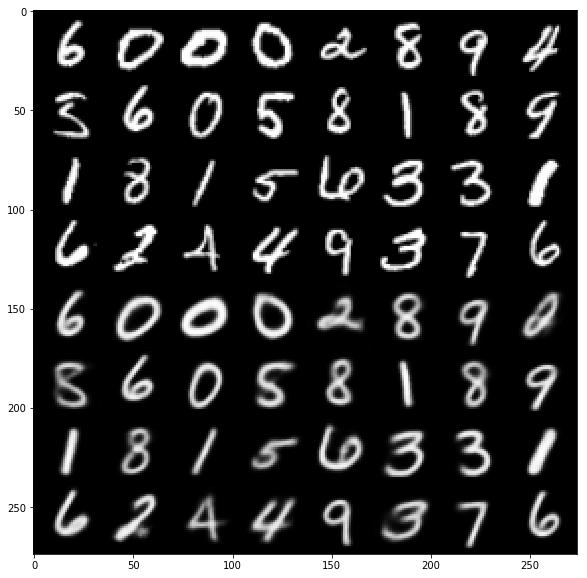

In [4]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) 
# Get a batch of data
for batch, labels in test_loader:
    break
    
#get best model,easrly stopping

viz = Visualizer(model)

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

# face
# recon=np.rollaxis(recon.numpy(), 0, 3)  
# print(recon[265:,:,:].max())
# recon[:,:,:]=(recon[:,:,:]+1)/2
# plt.imshow(recon[:,:,:].astype(float))

#MNIST
plt.imshow(recon.numpy()[0, :, :].astype(float), cmap='gray')
plt.savefig(path+"/recon.png")
print(recon.numpy()[0, :, :].max())



In [15]:
def TCR():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont']
        cov = covmatrix(mean)
        cov[torch.abs(cov)<=1e-6]=0
        cor = cov2cor(cov)
        #print(np.sum(np.diag(cor)))
        totalc += np.sum(cor) 

    return totalc/len(test_loader)

def TCV():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont']
        cov = covmatrix(mean).cpu().detach().numpy()
        cov = cov-np.diag(np.diag(cov))
        #print(np.sum(cov**2) )
        totalc += np.sum(cov**2) 
        
    return totalc/len(test_loader)


def covmatrix(mean):
    exp_mu = torch.mean(mean, dim=0)  #####mean through batch

    # expectation of mu mu.tranpose
    mu_expand1 = mean.unsqueeze(1)  #####(batch_size, 1, number of mean of latent variables)
    mu_expand2 = mean.unsqueeze(2)  #####(batch_size, number of mean of latent variables, 1) ignore batch_size, only transpose the means
    exp_mu_mu_t = torch.mean(mu_expand1 * mu_expand2, dim=0)

    # covariance of model mean
    cov = exp_mu_mu_t - exp_mu.unsqueeze(0) * exp_mu.unsqueeze(1) 
    return cov
def cov2cor(c):
    #input batch * n_cont
    c = c.cpu().detach()
    d=np.zeros_like(c)
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            d[i,j]=c[i,j]/(np.sqrt(c[i,i]*c[j,j]+1e-10))
    return d
tcor=TCR()
tcov=TCV()
print(tcor-n_cont,tcov)
trainer.evaluate(test_loader)


/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


-20.391747067688378 0.25718983324470035
Valid Loss: 134.990, Recon Error: 0.015


(134.9899979123644, tensor(0.0146, device='cuda:0', grad_fn=<DivBackward0>))

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


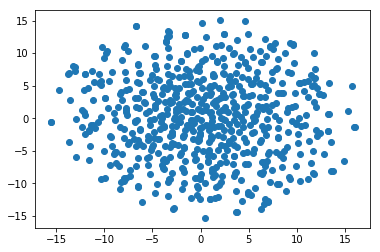

In [6]:
###latent space T-SNE visualization
from sklearn.manifold import TSNE
import numpy as np

samples = torch.zeros(1)
labels = torch.zeros(1)
for i in range(10):
    test_batch = iter(test_loader)
    test_batch = next(test_batch)
    new_labels =torch.tensor(test_batch[1])
    latent_dist= model.encode(torch.tensor(test_batch[0]).cuda())
    new_samples = model.reparameterize(latent_dist)
    if torch.sum(samples) == 0:
        samples =new_samples
        labels = new_labels
    else:
        samples = torch.cat((samples,new_samples),0)
        labels = torch.cat((labels, new_labels),0)
    #print(samples.shape)
    
##latent_varibales should be N,D--->N,2


# latent_variables = samples.reshape(samples[0],-1)
tsne = TSNE(n_components=2)

tsne.fit_transform(samples.detach().cpu().numpy())

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
#plt.imshow()

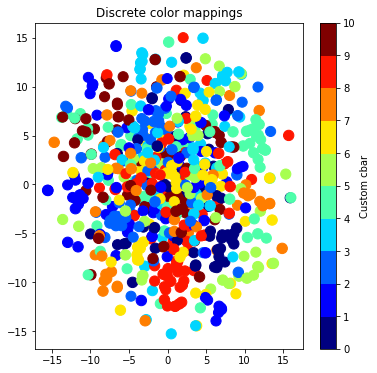

In [7]:
# import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N = 10 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = tsne.embedding_[:,0]
y = tsne.embedding_[:,1]
tag = labels# Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,110,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(path+"/scatter.png")
plt.show()




t-SNE demo
import numpy as np
from sklearn.manifold import TSNE
X = np.arange(40).reshape(5,4,2)

X_new = X.reshape(5,-1)
#X = np.array([[[0,0], [0,0], [0,0]], [[0,0], [0,1], [1,1]], [[1,1], [1,0], [0,1]], [[1,1], [1,1], [1,1]]])
print(X.shape,X)
print("--------")
print(X_new)

tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

# Plot samples

samples = viz.samples()
plt.imshow(samples.numpy()[0, :174, :], cmap='gray')
print(np.sum(samples.numpy()[0, :174, :]))
print(samples.numpy()[0, :, :].shape)
####origin
4*28

0.5


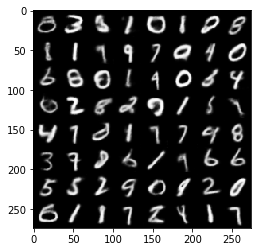

In [8]:
# Plot samples
import matplotlib as mpl

#MNIST
samples = viz.samples()
sample=samples.numpy()[0, :, :]/2+0.5
plt.imshow(sample, cmap='gray')
plt.imsave(path+"/samples",samples.numpy()[0, :, :]/2+0.5, cmap='gray')

print((sample).min())

# face
# fig = plt.figure(figsize=(50, 50)) 
# samples = viz.samples()
# samples = np.rollaxis(samples.numpy(), 0, 3)  
# print(samples[:,:,0].max())
# samples=(samples+1)/2
# plt.imshow(samples.astype(float),norm = norm)
# plt.imsave(path+"/samples",samples)
###DIP

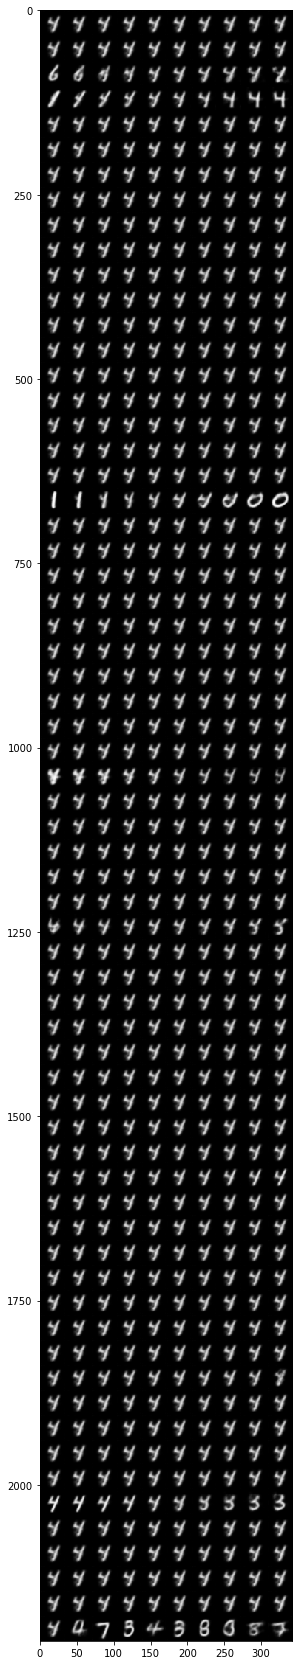

In [9]:
# Plot all traversals
fig = plt.figure(figsize=(30, 30))
traversals = viz.all_latent_traversals(size=10)

#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/all_traversals",traversals.numpy()[0, :, :], cmap='gray')

#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)  
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/all_traversals",traversals)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

0.9022344

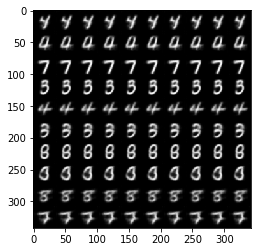

In [10]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=5, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/contVSdisc",traversals.numpy()[0, :, :], cmap='gray')

traversals.numpy()[0, :, :].max()
#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/contVSdisc",traversals)
##origin

all_t = viz.all_latent_traversals()
print(all_t.shape)
plt.imshow(all_t.numpy()[0, :, :], cmap='gray')
plt.imsave("figures/beta/all_",traversals.numpy()[0, :, :], cmap='gray')

continuous


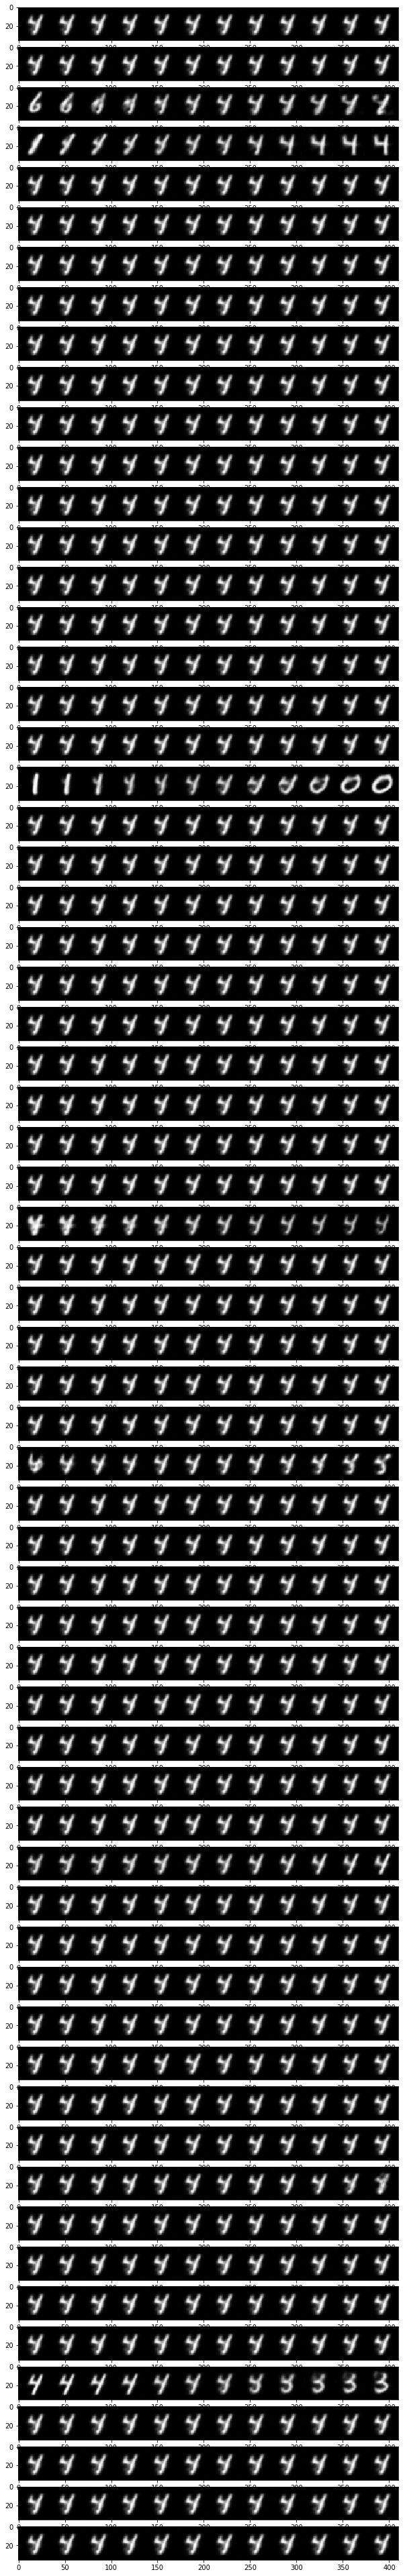

In [11]:
%matplotlib inline
import torch
import numpy as np
# Plot a grid of some traversals

fig = plt.figure(figsize=(70, 70))  # width, height in inches
print("continuous")
for i in range(n_cont):
    traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None,size=12)
    
    #MNIST
    sub = fig.add_subplot(n_cont, 1, i + 1)
    plt.savefig(path+"/cont{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    
    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_cont, 1, i + 1)
#     traversals=(traversals+1)/2
#     plt.imshow(traversals)   
plt.savefig(path+"/cont.png")
   

discrete


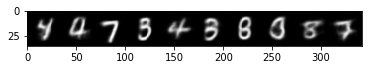

In [12]:
print("discrete")
for i in range(n_disc):
    traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i,size=10)
    ##MNIST
    sub = fig.add_subplot(n_disc, 1, i + 1)
    plt.savefig(path+"/disc{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_disc, 1, i + 1)
# traversals=(traversals+1)/2
# plt.savefig(path+"/disc{}.png".format(i))
# plt.imshow(traversals)

In [13]:
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image

    
# face    
# def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

#         # Generate latent traversal
# #         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
# #                                                              disc_idx=disc_idx,
# #                                                              size=size)
#         dim = n_cont + sum(disc)
#         if prior:
#             latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
#         else:
#             latent_samples= torch.zeros((1,dim))
            
#         latent_samples[:,disc_idx+n_cont-1] = 1.0
#         latent_samples[:,cont_idx]=cont_v
        

#         # Map samples through decoder
#         generated = decode_latents(model, latent_samples.float()).squeeze()
#         generated  = np.rollaxis(generated.detach().numpy(), 0, 3)
#         generated = (generated +1)/2
#         print(generated.min(),generated.max())
#         plt.imshow(generated)

        
# def decode_latents(model, latent_samples):

#         latent_samples = Variable(latent_samples)
#         if model.use_cuda:
#             latent_samples = latent_samples.cuda()
#             result = model.decode(latent_samples).cpu()
#         return result

#MNIST
def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
        dim = n_cont + sum(disc)
        if prior:
            latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
        else:
            latent_samples= torch.zeros((1,dim))
            
        latent_samples[:,disc_idx+n_cont-1] = 1.0
        latent_samples[:,cont_idx]=cont_v
        

        # Map samples through decoder
        generated = decode_latents(model, latent_samples.float()).squeeze()
        plt.imshow(generated.detach().numpy(),cmap="gray")

        
def decode_latents(model, latent_samples):

        latent_samples = Variable(latent_samples)
        if model.use_cuda:
            latent_samples = latent_samples.cuda()
        return model.decode(latent_samples).cpu()

In [14]:
from ipywidgets import interact, fixed
from IPython.display import display
def interactive_view(model,n_cont,disc):
    
    
    interact(single_traversal,model=fixed(model),
             n_cont=fixed(n_cont), cont_idx=(0,n_cont,1), cont_v=(-2.5,2.5,0.5),
             disc=fixed(disc),disc_idx=(0,9,1),
             prior=True);
             
interactive_view(model,n_cont,disc)

interactive(children=(IntSlider(value=32, description='cont_idx', max=64), FloatSlider(value=0.0, description=…